In [34]:
# libraries for EDA
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [84]:
# connect to SQL database and convert to dataframes

cnx = sqlite3.connect('../data/database.sqlite')

categories = pd.read_sql_query("SELECT * FROM categories", cnx)
reviews = pd.read_sql_query("SELECT * FROM reviews", cnx)
podcasts = pd.read_sql_query("SELECT * FROM podcasts", cnx)

In [16]:
# review total counts

print('{} reviews'.format(len(reviews)))
print('{} podcasts'.format(len(podcasts)))
print('{} categories'.format(len(categories['category'].unique())))

1239923 total reviews
46687 total podcasts
26 total categories


In [50]:
# explore character and word counts in the reviews and their titles

title_chars = reviews['title'].str.len()
review_chars = reviews['content'].str.len()

title_words = reviews['title'].str.split().str.len()
review_words = reviews['content'].str.split().str.len()

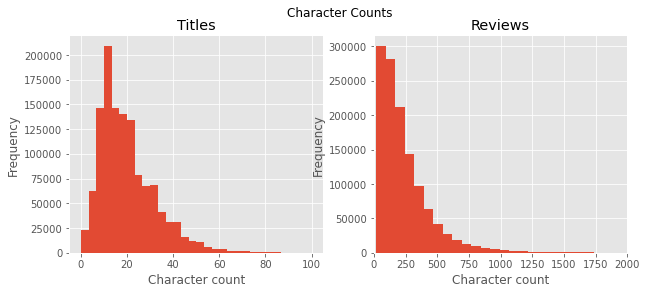

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(title_chars, bins=30)
ax[0].title.set_text('Titles')
ax[0].set_xlabel('Character count')
ax[0].set_ylabel('Frequency')

ax[1].hist(review_chars, bins=80)
ax[1].set_xlim(0,2000)
ax[1].title.set_text('Reviews')
ax[1].set_xlabel('Character count')
ax[1].set_ylabel('Frequency')

plt.suptitle('Character Counts')
plt.savefig('../img/character_counts.png', dpi=300);

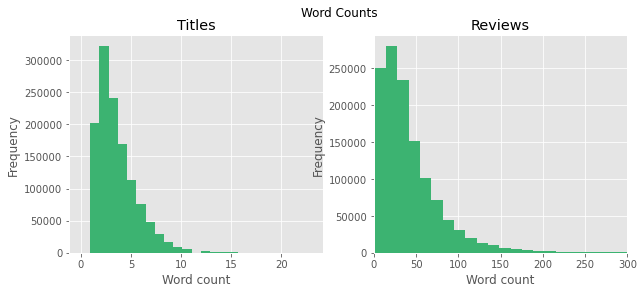

In [63]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(title_words, bins=25, color='mediumseagreen')
ax[0].title.set_text('Titles')
ax[0].set_xlabel('Word count')
ax[0].set_ylabel('Frequency')

ax[1].hist(review_words, bins=120,color='mediumseagreen')
ax[1].set_xlim(0,300)
ax[1].title.set_text('Reviews')
ax[1].set_xlabel('Word count')
ax[1].set_ylabel('Frequency')

plt.suptitle('Word Counts')
plt.savefig('../img/word_counts.png', dpi=300);

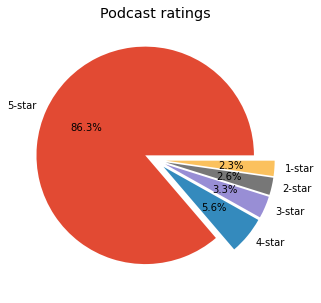

In [57]:
# examine class balance
rating_counts = reviews['rating'].value_counts()

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(rating_counts, explode= [.1,.1,.1,.1,.1], autopct='%1.1f%%', 
       labels=['5-star','4-star','3-star','2-star','1-star'])
plt.title('Podcast ratings')
plt.savefig('../img/ratings_pie.png', dpi=300);

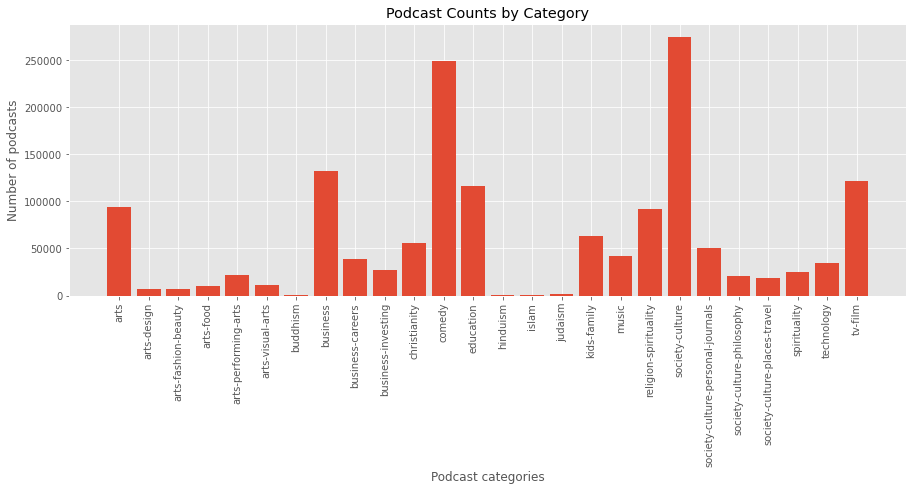

In [105]:
# reviews per podcast category will be useful for identifying trends
# specific to certain genres
review_categories = pd.merge(reviews, categories)
category_counts = review_categories.groupby('category').size().reset_index()
category_list = category_counts['category'].tolist()
counts = category_counts.iloc[:,1]

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(category_list, counts)
ax.set_xlabel('Podcast categories')
ax.set_ylabel('Number of podcasts')
plt.title('Podcast Counts by Category')
plt.xticks(rotation=90)
plt.savefig('../img/podcast_categories.png', dpi=300);